In [2]:
import networkx as nx
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

to_remove_list = ['reddit.com', 'pics', 'worldnews', 'programming', 'business', 'politics', 'obama', 
                  'science', 'technology', 'WTF', 'AskReddit', 'netsec', 'philosophy', 'videos', 'offbeat',
                  'funny', 'entertainment', 'linux', 'geek', 'gaming', 'comics', 'gadgets', 'nsfw', 'news', 'environment',
                  'atheism', 'canada', 'math', 'Economics', 'scifi', 'bestof', 'cogsci', 'joel', 'Health', 'guns', 'photography', 'software',
                  'history', 'ideas']
G = nx.read_gml('graphs/snet.gml')
print(nx.info(G))
snet_t = G.subgraph(to_remove_list).copy()
print(nx.info(snet_t))
nx.write_gml(snet_t, 'graphs/snet_t.gml')

Graph with 4359 nodes and 156959 edges
Graph with 39 nodes and 741 edges


C:\Users\Nikola\AppData\Local\Temp\ipykernel_23916\2340547734.py:13: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))
C:\Users\Nikola\AppData\Local\Temp\ipykernel_23916\2340547734.py:15: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(snet_t))


# Odgovori Na Pitanja

### 7 - Gustina Mreze je 1 (iz Gephi alata)

### 8 - Prosecne distance iznose:  1. Dijametar mreze je: 1 (iz Gephi alata)

### 9 - Povezane komponente

In [3]:
print("Broj povezanih kompnenti: " , nx.number_connected_components(snet_t))

Broj povezanih kompnenti:  1


In [5]:
connected_componnets = sorted(nx.connected_components(snet_t), key=len, reverse=True)
print("Velicina povezanih komponenti:")
for x in connected_componnets:
    print(len(x) , "  ")

Velicina povezanih komponenti:
39   


Posotji gigantska komponenta

### 10 - Globalni i prosecni koeficijent klasterizacije

In [6]:
print( "Prosecni koeficijent klasterizacije: " , nx.average_clustering(snet_t), ", Globalni koeficijent klasterizacije: " , nx.transitivity(snet_t) )

Prosecni koeficijent klasterizacije:  1.0 , Globalni koeficijent klasterizacije:  1.0


In [7]:
from collections import Counter
from operator import itemgetter
import matplotlib.pyplot as plt
def plot_deg_frequency(G):
    
    _, deg_list = zip(*nx.clustering(G).items())
    l = []
    for k in deg_list:
        if k > 0:
            l.append(k)
    
    deg_counts = Counter(l)        
    print(deg_counts)
    x, y = zip(*deg_counts.items())                                                      

    plt.figure(1)   


    plt.xlabel('weighted degree')                                                                                                        
    plt.xscale('linear')                                                                                                                
    plt.xlim(0, max(x))  

    plt.ylabel('frequency')                                                                                                          
    plt.yscale('linear')                                                                                                                
    plt.ylim(1, max(y))                                                                                                             
                                                                                                                                                                                                    
    plt.scatter(x, y, marker='.')                                                                                                    
    plt.show()

Counter({1.0: 39})


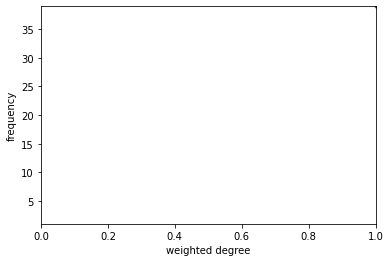

In [8]:
plot_deg_frequency(snet_t)

1.0
Counter({1.0: 39})


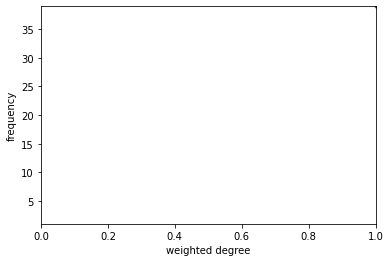

In [9]:
n = snet_t.number_of_nodes()
m = snet_t.number_of_edges()

p = ( 2*float(m) ) / ( n* (n-1) )
print(p)
G_er = nx.erdos_renyi_graph(n, p)
plot_deg_frequency(G_er)

Klasterizacija je jako izrazena sto se moze videti i sa grafika



### 11 - Da. Mreza iskazuje osobine malog sveta. To se moze zakljuciti na osnovu visoke klasterizacije i prosecne duzine puta

In [8]:
snet_t.edges()

EdgeView([('comics', 'nsfw'), ('comics', 'gaming'), ('comics', 'entertainment'), ('comics', 'gadgets'), ('comics', 'Health'), ('comics', 'pics'), ('comics', 'guns'), ('comics', 'funny'), ('comics', 'linux'), ('comics', 'programming'), ('comics', 'ideas'), ('comics', 'reddit.com'), ('comics', 'joel'), ('comics', 'videos'), ('comics', 'business'), ('comics', 'history'), ('comics', 'science'), ('comics', 'obama'), ('comics', 'philosophy'), ('comics', 'photography'), ('comics', 'software'), ('comics', 'AskReddit'), ('comics', 'cogsci'), ('comics', 'math'), ('comics', 'technology'), ('comics', 'politics'), ('comics', 'atheism'), ('comics', 'bestof'), ('comics', 'scifi'), ('comics', 'news'), ('comics', 'environment'), ('comics', 'geek'), ('comics', 'WTF'), ('comics', 'netsec'), ('comics', 'Economics'), ('comics', 'worldnews'), ('comics', 'offbeat'), ('comics', 'canada'), ('funny', 'nsfw'), ('funny', 'gaming'), ('funny', 'entertainment'), ('funny', 'gadgets'), ('funny', 'Health'), ('funny', '

### 12 -  asortativna analiza


Koeficijent asortativnosti na osnovu netežinskog stepena čvora: nan


C:\Users\Nikola\anaconda3\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)


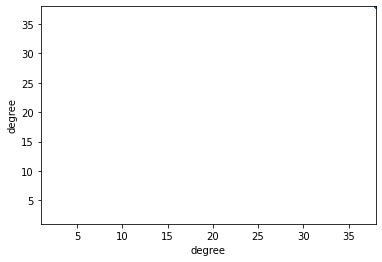

In [10]:
r1 = nx.degree_assortativity_coefficient(snet_t)
print(f"Koeficijent asortativnosti na osnovu netežinskog stepena čvora: {r1}")

def plot_deg_corr(g, xscale = "linear", yscale = "linear"):
    first = []
    second = []
    for i, k in g.edges():
        first.append(g.degree(i))
        first.append(g.degree(k))
        second.append(g.degree(i))
        second.append(g.degree(k))

    plt.figure(1)   

    plt.xlabel('degree')                                                                                                             
    plt.xscale(xscale)                                                                                                                
    plt.xlim(1, max(first)) 

    plt.ylabel('degree')                                                                                                          
    plt.yscale(yscale)                                                                                                                
    plt.ylim(1, max(second))                                                                                                             

    plt.scatter(first, second, marker='.')                                                                                                    
    plt.show()

plot_deg_corr(snet_t)

### 13 - Klub bogatih


Mreza je potpuno povezana tako da ne zadovoljava uslov kluba bogatih

### 14 - Power Law


In [11]:
from collections import Counter
from operator import itemgetter

def plot_deg_frequency(G, weighted = False, xscale = "log", yscale = "log"):

    if weighted:
        degrees = G.degree(weight="weight")
    else:
        degrees = G.degree()
        
    _, deg_list = zip(*degrees)
    deg_counts = Counter(deg_list)        
    print(deg_counts)
    x, y = zip(*deg_counts.items())                                                      

    plt.figure(1)   

    # prep axes   
    if weighted:
        plt.xlabel('weighted degree')  
    else:
        plt.xlabel('degree')                                                                                                             
    plt.xscale(xscale)                                                                                                                
    plt.xlim(1, max(x))  

    plt.ylabel('frequency')                                                                                                          
    plt.yscale(yscale)                                                                                                                
    plt.ylim(1, max(y))                                                                                                             
                                                                                                                                                                                                    
    plt.scatter(x, y, marker='.')                                                                                                    
    plt.show()

Counter({38: 39})


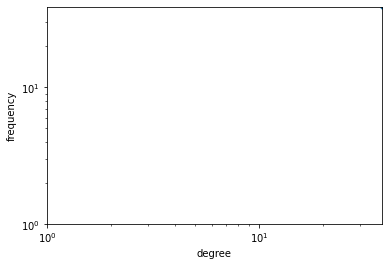

In [12]:
plot_deg_frequency(snet_t)

In [13]:
import powerlaw
degree_sequence = sorted([d for n, d in snet_t.degree()], reverse=True)
results = powerlaw.Fit(degree_sequence)
print(results)
results.supported_distributions

Calculating best minimal value for power law fit


Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.


{'power_law': powerlaw.Power_Law,
 'lognormal': powerlaw.Lognormal,
 'exponential': powerlaw.Exponential,
 'truncated_power_law': powerlaw.Truncated_Power_Law,
 'stretched_exponential': powerlaw.Stretched_Exponential,
 'lognormal_positive': powerlaw.Lognormal_Positive}

In [14]:

R, p = results.distribution_compare('power_law', 'exponential')
print(f"Loglikelihood ratio: {R}")
print(f"Statistical significance: {p}")
R, p = results.distribution_compare('power_law', 'truncated_power_law')
print(f"Loglikelihood ratio: {R}")
print(f"Statistical significance: {p}")

C:\Users\Nikola\anaconda3\lib\site-packages\powerlaw.py:1151: RuntimeWarning: invalid value encountered in double_scalars
  self.alpha = 1 + (self.n / sum(log(data/self.xmin)))


Loglikelihood ratio: 0
Statistical significance: 1
Loglikelihood ratio: 0
Statistical significance: 1


C:\Users\Nikola\anaconda3\lib\site-packages\powerlaw.py:1170: RuntimeWarning: invalid value encountered in double_scalars
  return 1 + len(data)/sum(log(data / (self.xmin)))
Not enough data. Returning nan
Not enough data. Returning nan
C:\Users\Nikola\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Nikola\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
No valid fits found.
Not enough data. Returning nan
Assuming nested distributions
C:\Users\Nikola\anaconda3\lib\site-packages\powerlaw.py:1383: RuntimeWarning: invalid value encountered in double_scalars
  alpha = 1 + len(data)/sum( log( data / (self.xmin) ))
No valid fits found.
Not enough data. Returning nan


Pošto je p-value za prvi slučaj značajno manje od 0.05, power law mnogo bolje fituje od eksponencijalne raspodele

### 15 -  Habovi i autoriteti

Posto je graf neusmeren, nakon pokretanja analize u alatu Gephi, klikom na dugmee "HITS", vidimo da su rezultati za habove i autoritete isti. 

### 16 - centralnosti

In [15]:
def calculate_centralities(G):

    DC_dict = nx.degree_centrality(G)
    CC_dict = nx.closeness_centrality(G)
    BC_dict = nx.betweenness_centrality(G)
    EVC_dict = nx.eigenvector_centrality(G, weight='weight')

    df1 = pd.DataFrame.from_dict(DC_dict, orient='index', columns=['DC'])
    df2 = pd.DataFrame.from_dict(CC_dict, orient='index', columns=['CC'])
    df3 = pd.DataFrame.from_dict(BC_dict, orient='index', columns=['BC'])
    df4 = pd.DataFrame.from_dict(EVC_dict, orient='index', columns=['EVC'])
    df = pd.concat([df1, df2, df3, df4], axis=1)
    return df

In [16]:
data_cent = calculate_centralities(snet_t)

### Po Bliskosti

In [17]:
df_cc = pd.DataFrame({'CC':data_cent['CC']})

df_cc.nlargest(5, 'CC')

,CC
comics,1.0
funny,1.0
guns,1.0
joel,1.0
Economics,1.0


### Po Stepenu

In [34]:
df_dc = pd.DataFrame({'DC':data_cent['DC']})
df_dc.nlargest(5, 'DC')

,DC
comics,1.0
funny,1.0
guns,1.0
joel,1.0
Economics,1.0


### Relaciona

In [19]:
df_dc = pd.DataFrame({'BC':data_cent['BC']})
df_dc.nlargest(5, 'BC')

,BC
comics,0.0
funny,0.0
guns,0.0
joel,0.0
Economics,0.0


### 17 - Po Sopstvenom vekotru

In [20]:
df_dc = pd.DataFrame({'EVC':data_cent['EVC']})
df_dc.nlargest(5, 'EVC')

,EVC
reddit.com,0.379795
politics,0.316792
pics,0.295384
funny,0.282877
science,0.276318


### 18 - Katz-ova skala

In [21]:
import scipy.stats as stats
lambda_max =  max(nx.adjacency_spectrum(G))
print(1/lambda_max)

C:\Users\Nikola\anaconda3\lib\site-packages\networkx\linalg\spectrum.py:110: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return sp.linalg.eigvals(nx.adjacency_matrix(G, weight=weight).todense())


(5.451925984405703e-06+0j)


In [22]:
KatzC_dict = nx.katz_centrality(snet_t, alpha=3e-06, beta=1.0, max_iter=1000, tol=1e-06, nstart=None, normalized=True, weight='weight')
df_katzc = pd.DataFrame.from_dict(KatzC_dict, orient='index', columns=['KC'])
df_katzc.nlargest(10, 'KC')

,KC
reddit.com,0.280776
politics,0.247758
pics,0.237753
funny,0.231434
science,0.228515
technology,0.223660
worldnews,0.220880
WTF,0.220452
entertainment,0.214771
programming,0.201766


In [15]:
l = {}
for i in snet_t.nodes():
    l[i] = 0.1
l['reddit.com'] = 1 

KatzC_dict = nx.katz_centrality(snet_t, alpha=3e-06, beta=l, max_iter=1000, tol=1e-06, nstart=None, normalized=True, weight='weight')
df_katzc = pd.DataFrame.from_dict(KatzC_dict, orient='index', columns=['KC'])
df_katzc.nlargest(10, 'KC')

,KC
reddit.com,0.675190
politics,0.217312
pics,0.201968
funny,0.194961
science,0.191444
technology,0.188175
worldnews,0.183828
WTF,0.182372
entertainment,0.179482
business,0.165517


### 19 - kompozitni rank

In [23]:

labele = ['DC', 'CC', 'BC', 'EVC', 'KC']
data_helper = pd.concat([data_cent , df_katzc ] , axis = 1)
df_ = data_helper
for metric in labele:
    df_[f"{metric}_rank"] = df_[f"{metric}"].rank(ascending=False) 
    
df_['composite_rank'] = df_['DC_rank'] * df_['CC_rank'] * df_['BC_rank'] * df_['EVC_rank'] * df_['KC_rank']
df_.nsmallest(10, 'composite_rank')
#df_.sort_values(['CC'], ascending = False, inplace=True)

,DC,CC,BC,EVC,KC,DC_rank,CC_rank,BC_rank,EVC_rank,KC_rank,composite_rank
reddit.com,1.0,1.0,0.0,0.379795,0.280776,20.0,20.0,20.0,1.0,1.0,8000.0
politics,1.0,1.0,0.0,0.316792,0.247758,20.0,20.0,20.0,2.0,2.0,32000.0
pics,1.0,1.0,0.0,0.295384,0.237753,20.0,20.0,20.0,3.0,3.0,72000.0
funny,1.0,1.0,0.0,0.282877,0.231434,20.0,20.0,20.0,4.0,4.0,128000.0
science,1.0,1.0,0.0,0.276318,0.228515,20.0,20.0,20.0,5.0,5.0,200000.0
technology,1.0,1.0,0.0,0.267164,0.223660,20.0,20.0,20.0,6.0,6.0,288000.0
worldnews,1.0,1.0,0.0,0.262058,0.220880,20.0,20.0,20.0,7.0,7.0,392000.0
WTF,1.0,1.0,0.0,0.260284,0.220452,20.0,20.0,20.0,8.0,8.0,512000.0
entertainment,1.0,1.0,0.0,0.249796,0.214771,20.0,20.0,20.0,9.0,9.0,648000.0
programming,1.0,1.0,0.0,0.223551,0.201766,20.0,20.0,20.0,10.0,10.0,800000.0


### 20 - 

     k      lambda_k
0    1 -2.399431e-11
1    2  2.593206e+03
2    3  2.824891e+03
3    4  8.433984e+03
4    5  8.825458e+03
5    6  1.524433e+04
6    7  1.596725e+04
7    8  1.769251e+04
8    9  2.283501e+04
9   10  2.379979e+04
10  11  2.580535e+04
11  12  2.911989e+04
12  13  3.091964e+04
13  14  3.256196e+04
14  15  4.065290e+04
15  16  4.281376e+04
16  17  4.720163e+04
17  18  6.254138e+04
18  19  7.430153e+04
19  20  7.705983e+04
20  21  7.884973e+04
21  22  8.232948e+04
22  23  8.676976e+04
23  24  8.984049e+04
24  25  9.292494e+04
25  26  9.791073e+04
26  27  1.108151e+05
27  28  1.337896e+05
28  29  1.436988e+05
29  30  1.891725e+05


<class 'networkx.utils.decorators.argmap'> compilation 46:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
C:\Users\Nikola\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1181: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
C:\Users\Nikola\anaconda3\lib\site-packages\matplotlib\collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


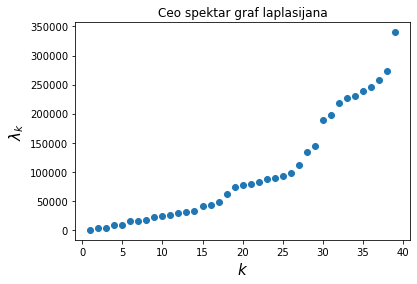

In [25]:
from scipy import linalg
def plot_scatterplot(x_data, y_data, x_label, y_label, title):
    fig, ax = plt.subplots()
    ax.scatter(x_data, y_data) 
    ax.set_ylabel(y_label, fontsize=15)
    ax.set_xlabel(x_label, fontsize=15)
    ax.set_title(title)
    plt.show() 
    
L = nx.laplacian_matrix(snet_t).toarray()

eigenvalues = linalg.eigvals(L) # TODO: change to .eigenvalsh because we know the matrix is symmetric
eigenvalues.sort()
enumerator = np.array(range(1, len(eigenvalues)+1))
df_eig = pd.DataFrame(list(zip(enumerator, eigenvalues)))

# write eigenvalue table
df_eig30 = df_eig[:30]
df_eig30.columns = ['k', 'lambda_k']
df_eig30 = df_eig30.astype({'k': 'int32', 'lambda_k':'float'})
print(df_eig30)
plot_scatterplot(enumerator, eigenvalues, r'$k$', r'$\lambda_k$', 'Ceo spektar graf laplasijana')

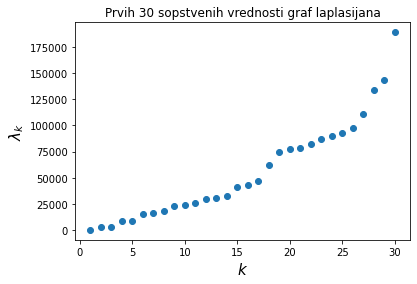

In [26]:
# prvih 30 sopstvenih vrednosti

df_eig_30 = df_eig[:30]

plot_scatterplot(df_eig_30.iloc[:,0], df_eig_30.iloc[:,1], r'$k$', r'$\lambda_k$', 'Prvih 30 sopstvenih vrednosti graf laplasijana')

In [13]:
# eigengap


df_gap = df_eig.iloc[:,1].diff()
df_gap = df_gap.astype(np.float64)

df_gap = df_gap[1:]
enumerator_column = np.array(range(1, len(df_gap)+1))

df_gap = pd.DataFrame(list(zip(enumerator_column, df_gap)))
  
plot_scatterplot(df_gap.iloc[:,0], df_gap.iloc[:,1], r'$k$', r'$\lambda_{k+1}-\lambda_k$','Eigengap')

plot_scatterplot(df_gap.iloc[:30,0], df_gap.iloc[:30,1], r'$k$', r'$\lambda_{k+1}-\lambda_k$','Eigengap prvih 30 sopstvenih vrednosti graf laplasijana')

NameError: name 'df_eig' is not defined

In [14]:
from sklearn.cluster import SpectralClustering
for k in range(2, 40):
    
    clustering = SpectralClustering(n_clusters=k,
    assign_labels="discretize", affinity="precomputed").fit(nx.adjacency_matrix(snet_t))

    colors = clustering.labels_
    c_string = []
    for c in colors:
        c_string.append(str(c))

    G = nx.Graph()
    for c, label in zip(c_string, snet_t.nodes()):
        G.add_node(label, color=c)

    for edge in snet_t.edges(data=True):
        #print(edge)
        G.add_edge(edge[0], edge[1], weight=edge[2]['weight'])

    # nx.write_pajek(G, "etf/spectral3.net")
    
    csizes = np.zeros(k)
    for c in colors:
        csizes[int(c)] += 1
    
    print(f"Podela na {k}: velicine komponenata su {csizes}")

C:\Users\Nikola\AppData\Local\Temp\ipykernel_23916\415987025.py:5: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  assign_labels="discretize", affinity="precomputed").fit(nx.adjacency_matrix(snet_t))


Podela na 2: velicine komponenata su [27. 12.]
Podela na 3: velicine komponenata su [ 5. 16. 18.]
Podela na 4: velicine komponenata su [13.  5. 10. 11.]
Podela na 5: velicine komponenata su [ 4. 19.  4. 12.  0.]
Podela na 6: velicine komponenata su [12.  6.  4.  4. 13.  0.]
Podela na 7: velicine komponenata su [ 9.  1.  1. 11. 11.  3.  3.]
Podela na 8: velicine komponenata su [ 4. 11.  1.  1.  1. 14.  6.  1.]
Podela na 9: velicine komponenata su [16.  2.  1.  1.  2.  3. 11.  3.  0.]
Podela na 10: velicine komponenata su [ 1.  1. 18.  1.  4.  1.  6.  1.  6.  0.]
Podela na 11: velicine komponenata su [ 5.  1.  2.  1.  1.  1.  1. 11.  4.  1. 11.]
Podela na 12: velicine komponenata su [10.  1.  1.  1.  1.  3.  5.  1. 11.  2.  2.  1.]
Podela na 13: velicine komponenata su [15.  1.  1.  1.  2.  1.  1.  5.  1.  5.  1.  5.  0.]
Podela na 14: velicine komponenata su [ 6.  3.  1.  1.  1.  2.  1. 20.  1.  1.  2.  0.  0.  0.]
Podela na 15: velicine komponenata su [ 1.  1.  8.  1.  1.  2.  1.  3.  

C:\Users\Nikola\anaconda3\lib\site-packages\scipy\sparse\linalg\_eigen\arpack\arpack.py:1592: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "


TypeError: Cannot use scipy.linalg.eigh for sparse A with k >= N. Use scipy.linalg.eigh(A.toarray()) or reduce k.

### 21 - Luvenska metoda

![alt text](images/snet_t_1_0.png "Bipartitivna mreža i unimodalne projekcije")

Slika: Luvenska metoda. Rezolucija 1.0. Broj komuna 2

![alt text](images/snet_F_0.5.png "Bipartitivna mreža i unimodalne projekcije")

Slika: Luvenska metoda. Rezolucija 0.5. Broj komuna 10

![alt text](images/snet_F_3.0.png "Bipartitivna mreža i unimodalne projekcije")

Slika: Luvenska metoda. Rezolucija 2. Broj komuna 1

### 22 -  Uocene komune


Uocene su dve vece zajednice (komune):

![alt text](images/snet_t_mod_1.png "Bipartitivna mreža i unimodalne projekcije")

Slika: Luvenska metoda. Rezolucija 1.0. Procenat cvorova koji pripadaju komuni je 66.67%

![alt text](images/snet_t_2.png "Bipartitivna mreža i unimodalne projekcije")

Slika: Luvenska metoda. Rezolucija 1.0. Procenat cvorova koji pripadaju komuni je 33.33%

### 23 - Mostovi


In [32]:
allBridges = list(nx.bridges(snet_t))
allBridgesCount = Counter(item for i in allBridges for item in i) 
allBridgesCount.most_common(5)

[]